🚀 [00] 启动流水线 | CDFT 宝宝房 | 模型: xgb

▶️ 运行 01_feature ... (如果卡住不动，是在计算中，请稍等)
✅ 完成 (8.0s)

▶️ 运行 02_tuning ... (如果卡住不动，是在计算中，请稍等)
✅ 完成 (18.6s)

▶️ 运行 03_training ... (如果卡住不动，是在计算中，请稍等)
✅ 完成 (6.8s)

▶️ 运行 04_viz ... (如果卡住不动，是在计算中，请稍等)
✅ 完成 (6.5s)

📊 [最新战果展示]


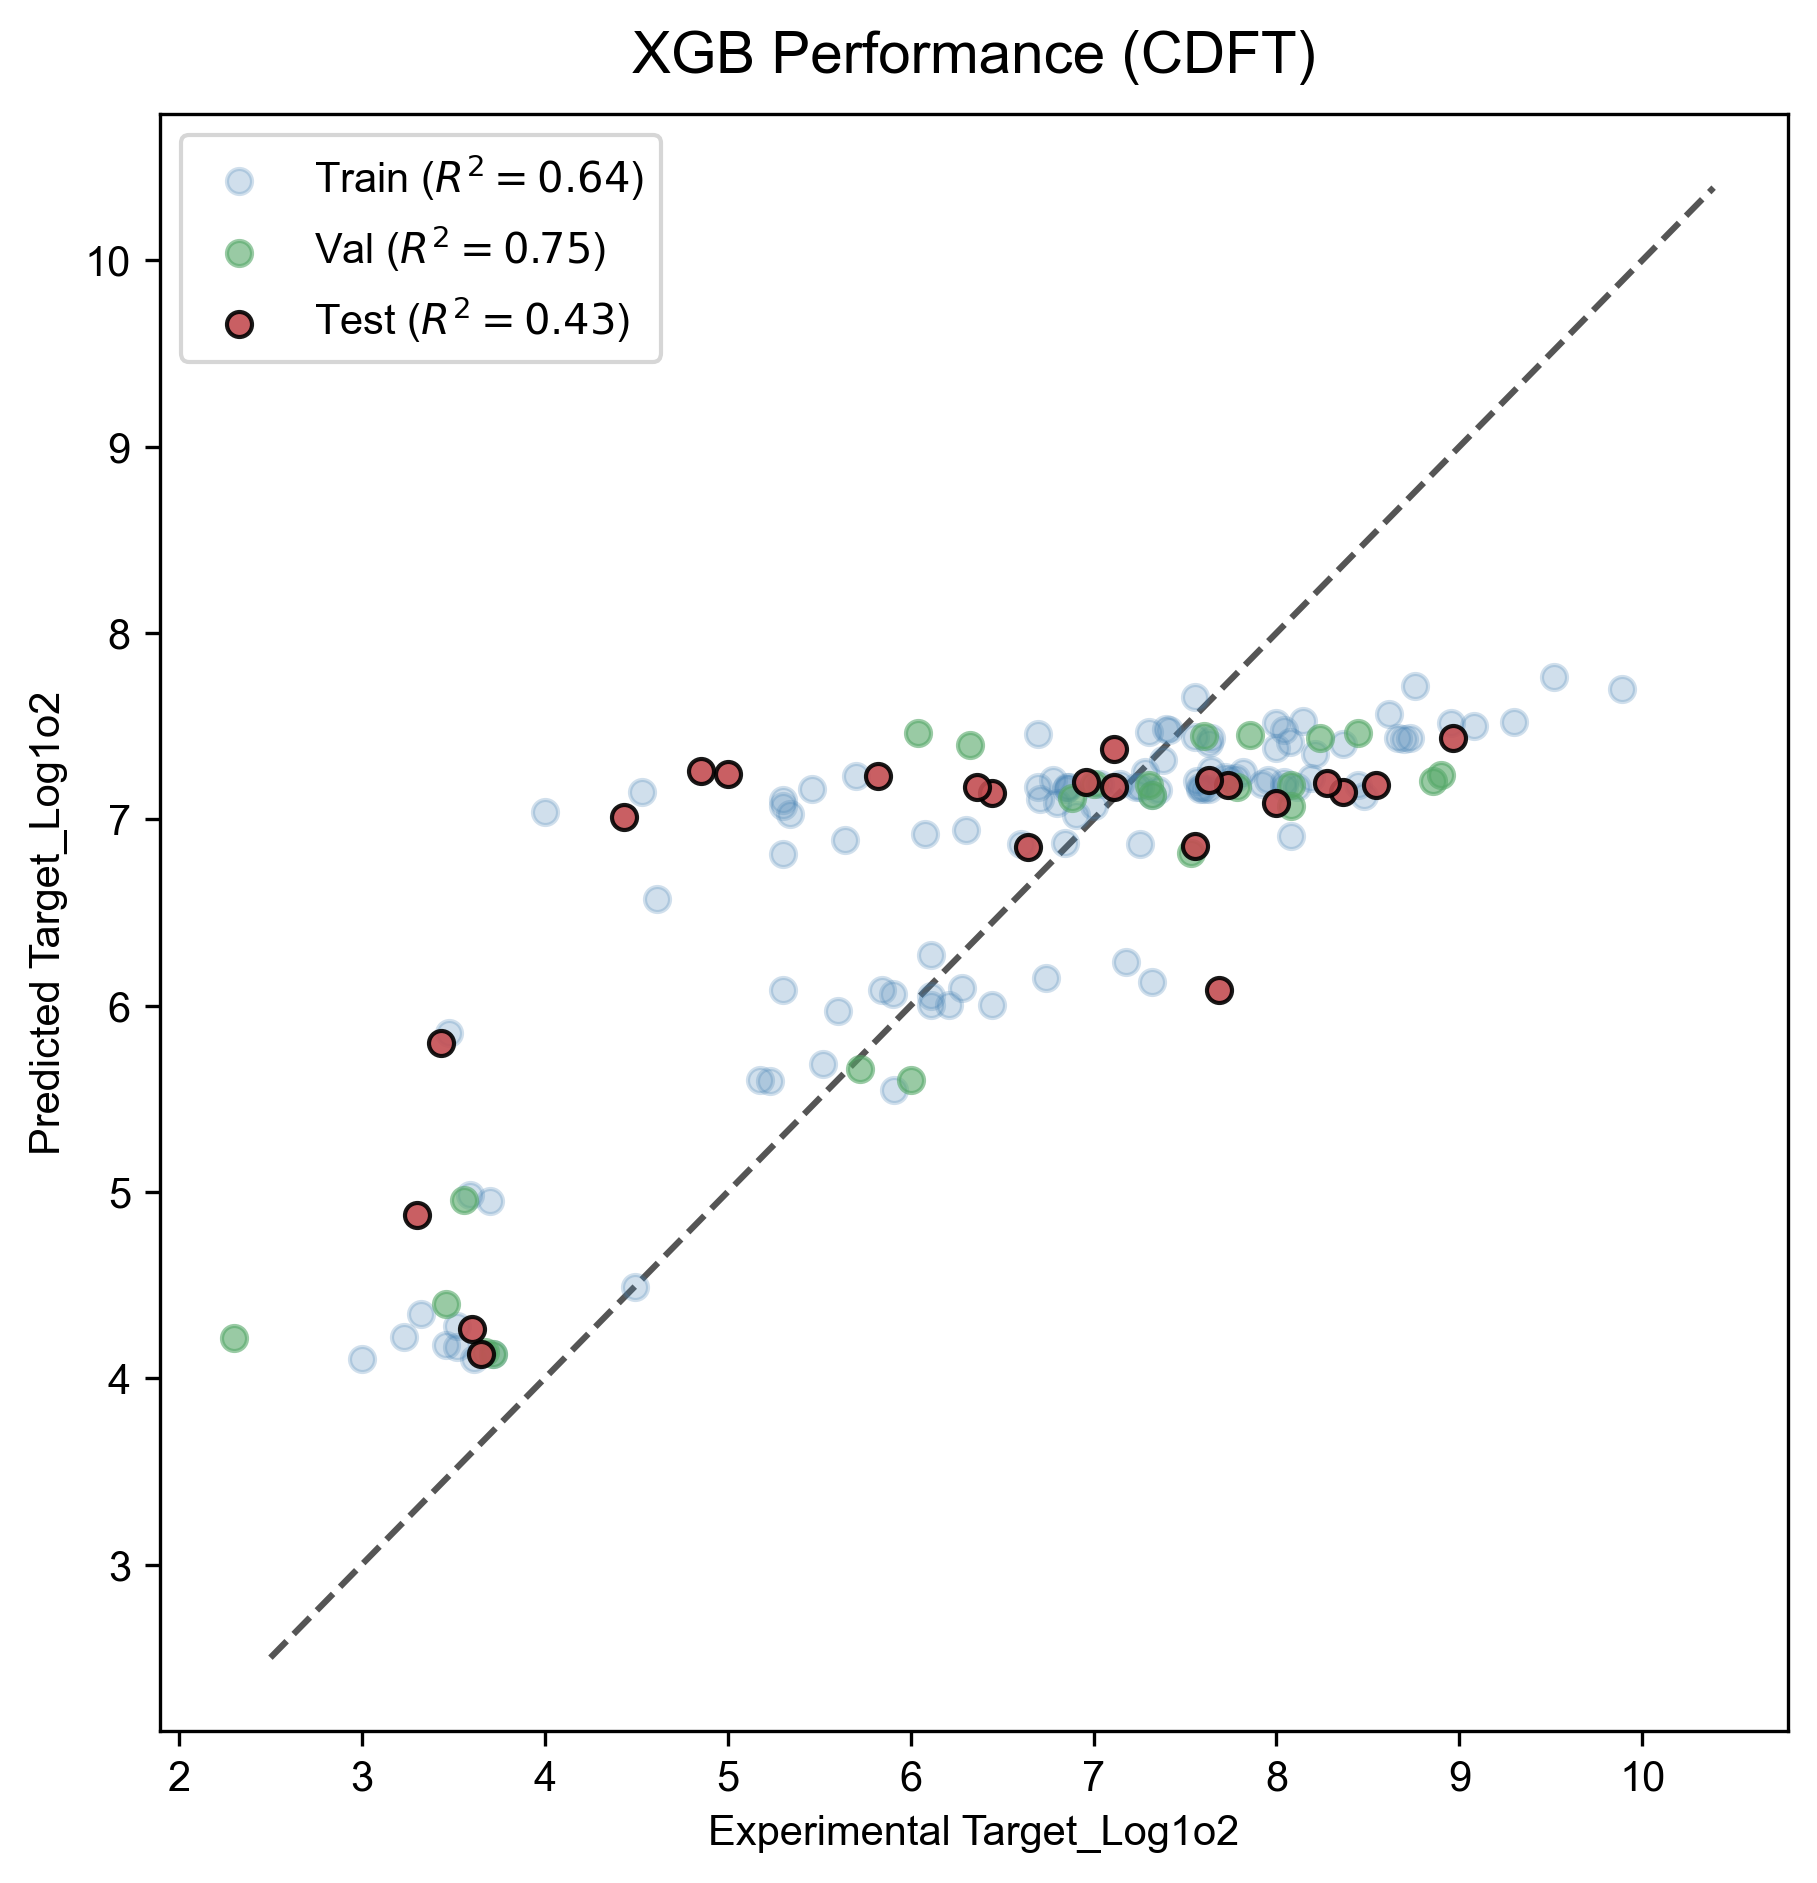

🖼️ Displaying: figures\Academic_Plot_XGB_CDFT_2.png

🏁 结束 | 总耗时: 0.7 min


In [11]:
# ==========================================
# File: project_cdft/notebooks/00_workflow_runner.ipynb
# ==========================================
# [最高统帅] 一键全流程
# ★当前状态: 02 调参已开启 (会比较慢，请耐心等待)

import os
import time
import subprocess
import glob
from IPython.display import Image, display

# --- 设置 ---
TARGET_MODEL = "xgb"

# ★★★ 任务清单 ★★★
RUN_STEPS = {
    "01_feature": True,   # 必须跑
    "02_tuning":  True,   # 第一次跑建议开启
    "03_training": True,  # 必须跑
    "04_viz":     True    # 必须跑
}
# ----------------

if 'notebooks' in os.getcwd(): os.chdir('..')
print(f"🚀 [00] 启动流水线 | CDFT 宝宝房 | 模型: {TARGET_MODEL}")

with open("current_model_config.txt", "w") as f: f.write(TARGET_MODEL)

tasks = {
    "01_feature": "notebooks/01_feature_engineering.ipynb",
    "02_tuning":  f"notebooks/02_model_tuning_{TARGET_MODEL}.ipynb",
    "03_training": f"notebooks/03_final_training_{TARGET_MODEL}.ipynb",
    "04_viz":     "notebooks/04_visualization.ipynb"
}

start_t = time.time()

for name, active in RUN_STEPS.items():
    if not active:
        print(f"⏭️ 跳过 {name}")
        continue

    path = tasks[name]
    # 路径容错
    if not os.path.exists(path):
        if os.path.exists(os.path.basename(path)): path = os.path.basename(path)
        else: print(f"⚠️ 跳过 {path} (文件不存在)"); continue

    print(f"\n▶️ 运行 {name} ... (如果卡住不动，是在计算中，请稍等)")
    t0 = time.time()
    ret = subprocess.run(f"jupyter nbconvert --to notebook --execute --inplace {path}", shell=True, capture_output=True)

    if ret.returncode == 0:
        print(f"✅ 完成 ({time.time()-t0:.1f}s)")

        # 跑完 04 直接显图
        if name == "04_viz":
            print("\n📊 [最新战果展示]")
            pngs = glob.glob("figures/*.png")
            if pngs:
                latest = max(pngs, key=os.path.getctime)
                display(Image(latest))
                print(f"🖼️ Displaying: {latest}")
    else:
        print(f"❌ 失败:\n{ret.stderr.decode()[-500:]}")
        break

print(f"\n🏁 结束 | 总耗时: {(time.time()-start_t)/60:.1f} min")